## Geographical data of tweets



-  `Place`, `Locations in Twitter text` ,   `User defined Location` , `coordinates`

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = "https://assets.datacamp.com/production/repositories/2161/datasets/55860c218310485e9400997ae33aecd0e97f8b51/sotu2018-reply.csv"
data = pd.read_csv(url,low_memory=False) 

In [4]:
data.head()

,contributors,coordinates,created_at,display_text_range,extended_entities,extended_tweet,extended_tweet-full_text,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user-screen_name
0,NaN,NaN,Wed Jan 31 00:21:22 +0000 2018,"[34, 140]",NaN,{'full_text': '@LouDobbs @realDonaldTrump @POT...,@LouDobbs @realDonaldTrump @POTUS Discourage i...,0,False,low,...,9.577015e+17,9.577015e+17,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@LouDobbs @realDonaldTrump @POTUS Discourage i...,1517358082783,True,ProfessorRobo
1,NaN,NaN,Wed Jan 31 02:42:15 +0000 2018,"[0, 14]",NaN,NaN,NaN,0,False,low,...,9.585300e+17,9.585300e+17,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@ChristianMohn https://t.co/WUP9k7DHrm,1517366535591,False,BethMohn
2,NaN,NaN,Tue Jan 30 19:19:49 +0000 2018,"[17, 140]",NaN,{'full_text': '@LarrySchweikart People stay ho...,@LarrySchweikart People stay home to avoid #Fa...,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/android"" ...",@LarrySchweikart People stay home to avoid #Fa...,1517339989113,True,ASilNY
3,NaN,NaN,Tue Jan 30 23:46:17 +0000 2018,"[12, 35]",NaN,NaN,NaN,0,False,low,...,9.584821e+17,9.584821e+17,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@WhiteHouse https://t.co/WgZvh2L6aT,1517355977521,False,mattg444
4,NaN,NaN,Tue Jan 30 22:21:52 +0000 2018,"[10, 60]",NaN,NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@aravosis I'm telling you he's practicing Tele...,1517350912194,False,hlthiskrieger


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   contributors                            0 non-null      float64
 1   coordinates                             0 non-null      float64
 2   created_at                              2000 non-null   object 
 3   display_text_range                      1613 non-null   object 
 4   extended_entities                       156 non-null    object 
 5   extended_tweet                          889 non-null    object 
 6   extended_tweet-full_text                889 non-null    object 
 7   favorite_count                          2000 non-null   int64  
 8   favorited                               2000 non-null   bool   
 9   filter_level                            2000 non-null   object 
 10  geo                                     0 non-null      floa

In [7]:
data = data.drop(['contributors','coordinates'], axis = 1)

In [8]:
data = data[data['place'].notna()]

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 14 to 1902
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   created_at                              92 non-null     object 
 1   display_text_range                      67 non-null     object 
 2   extended_entities                       10 non-null     object 
 3   extended_tweet                          30 non-null     object 
 4   extended_tweet-full_text                30 non-null     object 
 5   favorite_count                          92 non-null     int64  
 6   favorited                               92 non-null     bool   
 7   filter_level                            92 non-null     object 
 8   geo                                     0 non-null      float64
 9   id                                      92 non-null     int64  
 10  id_str                                  92 non-null     int64  
 1

In [11]:
import ast

def parse_place(place):
    if isinstance(place, str):
        return ast.literal_eval(place)
    return place

data['place_parsed'] = data['place'].apply(parse_place)


In [12]:
def getBoundingBox(place):
    if isinstance(place, dict):
        bb = place.get('bounding_box')
        if bb and 'coordinates' in bb:
            return bb['coordinates'][0]
    return None

bounding_boxes = data['place_parsed'].apply(getBoundingBox)
print(bounding_boxes.dropna().iloc[0])


[[-74.041878, 40.570842], [-74.041878, 40.739434], [-73.855673, 40.739434], [-73.855673, 40.570842]]


In [17]:
def calculateCentroid(place):
    """Calculates the centroid from a bounding box."""
    if not isinstance(place, dict):
        return None

    bb = place.get('bounding_box')
    if not bb:
        return None

    coordinates = bb['coordinates'][0]

    longs = np.unique([x[0] for x in coordinates])
    lats  = np.unique([x[1] for x in coordinates])

    if len(longs) == 1 and len(lats) == 1:
        return (longs[0], lats[0])
    elif len(longs) == 2 and len(lats) == 2:
        return (np.mean(longs), np.mean(lats))
    else:
        return None


In [18]:
centroids = data['place_parsed'].apply(calculateCentroid)
centroids


14             (-73.9487755, 40.655138)
102            (-87.966117, 41.5109525)
109             (-77.006929, 38.886757)
110     (-97.73644, 30.509081000000002)
112            (-80.926628, 33.6311395)
                     ...               
1839             (-0.148936, 51.500092)
1846           (-120.882482, 47.273022)
1865           (-73.9487755, 40.655138)
1882           (-80.649824, 35.0643235)
1902           (-78.837021, 35.7561885)
Name: place_parsed, Length: 92, dtype: object

c:\Python312\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Python312\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Python312\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Python312\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


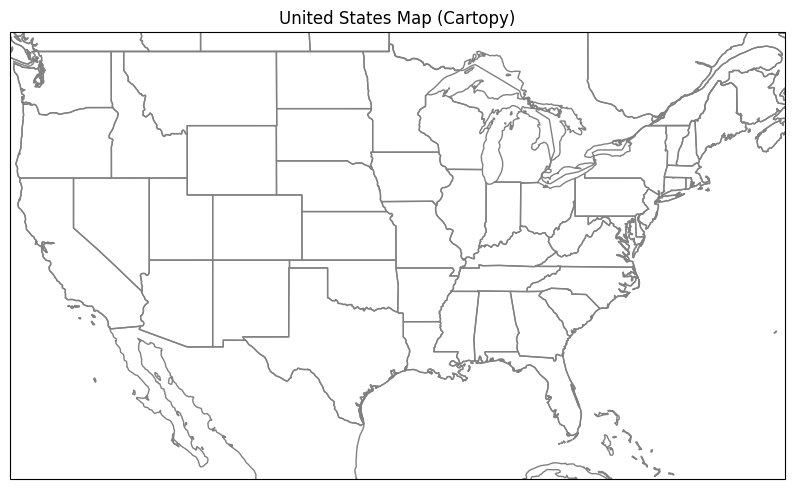

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create figure and axis with Mercator projection
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mercator())

# Set US bounding box: [lon_min, lon_max, lat_min, lat_max]
ax.set_extent([-125, -64, 22, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')
ax.add_feature(cfeature.STATES, edgecolor='gray')

plt.title("United States Map (Cartopy)")
plt.show()


In [ ]:
#pip install cartopy


     ---------------------------------------- 0.0/65.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.4 kB ? eta -:--:--
     ---------------------------------------- 65.4/65.4 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 871.5 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.0 MB 871.5 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.0 MB 871.5 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.0 MB 871.5 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.0 MB 871.5 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.0 MB 871.5 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.0 MB 871.5 kB/s eta 0:00:13
   ---------

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\cartopy_feature_download.exe' -> 'c:\\Python312\\Scripts\\cartopy_feature_download.exe.deleteme'



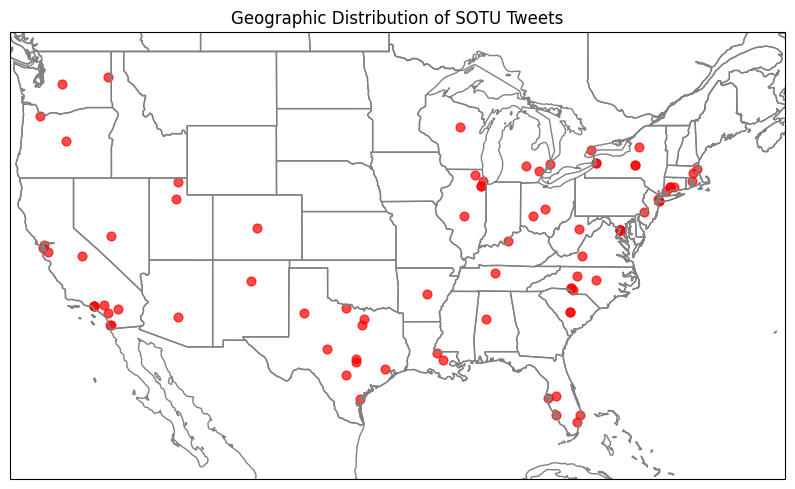

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Calculate the centroids
centroids = data['place_parsed'].apply(calculateCentroid)

# Keep only valid centroids
centroids = centroids.dropna()

# Extract longitude and latitude
lon = [c[0] for c in centroids]
lat = [c[1] for c in centroids]

# Create map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mercator())

# US bounding box
ax.set_extent([-125, -64, 22, 50], crs=ccrs.PlateCarree())

# Draw continents, coastlines, countries, and states
ax.add_feature(cfeature.LAND, facecolor='white', zorder=0)
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')
ax.add_feature(cfeature.STATES, edgecolor='gray')

# Plot tweet locations
ax.scatter(
    lon,
    lat,
    alpha=0.7,
    color='red',
    s=40,
    transform=ccrs.PlateCarree()
)

plt.title("Geographic Distribution of SOTU Tweets")
plt.show()


In [32]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()



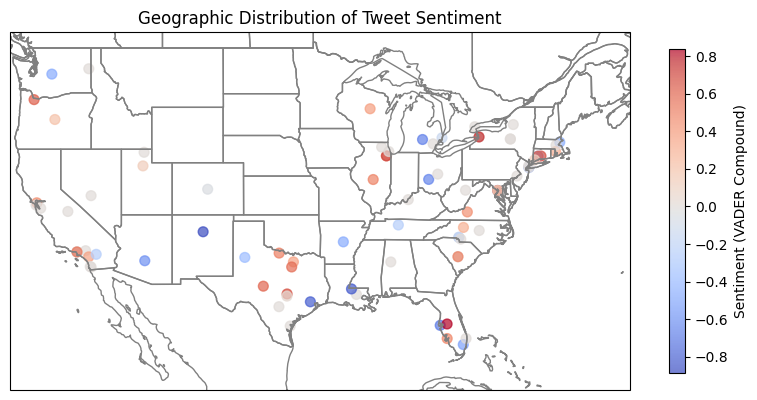

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# --- Prepare sentiment scores ---
sentiment_scores = data['text'].apply(sid.polarity_scores)
sentiment_scores = sentiment_scores.apply(lambda x: x['compound'])

# --- Calculate centroids ---
centroids = data['place_parsed'].apply(calculateCentroid)

# Keep only valid centroids & sentiment
valid = centroids.notna() & sentiment_scores.notna()

centroids = centroids[valid]
sentiment_scores = sentiment_scores[valid]

lon = [c[0] for c in centroids]
lat = [c[1] for c in centroids]

# --- Create map ---
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mercator())

# US bounding box
ax.set_extent([-125, -64, 22, 50], crs=ccrs.PlateCarree())

# Map features
ax.add_feature(cfeature.LAND, facecolor='white', zorder=0)
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')
ax.add_feature(cfeature.STATES, edgecolor='gray')

# --- Scatter plot with sentiment coloring ---
sc = ax.scatter(
    lon,
    lat,
    c=sentiment_scores,
    cmap='coolwarm',
    alpha=0.7,
    s=50,
    transform=ccrs.PlateCarree()
)

# Colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Sentiment (VADER Compound)')

plt.title("Geographic Distribution of Tweet Sentiment")
plt.show()
